<a href="https://colab.research.google.com/github/rajuzumaki2207/Time_series_Sequence/blob/main/StateSpaceModels_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML/Projects/global_temp.csv")

In [4]:
# example of simulating a binomial process and counting success
from numpy.random import binomial
# define the parameters of the distribution
p = 0.3
k = 100
# run a single simulation
success = binomial(k, p)
print('Total Success: %d' % success)

Total Success: 33


In [5]:
# calculate moments of a binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.3
k = 100
# calculate moments
mean, var, _, _ = binom.stats(k, p, moments='mvsk')
print('Mean=%.3f, Variance=%.3f' % (mean, var))

Mean=30.000, Variance=21.000


In [6]:
dist = binom(k, p)
for n in range(10, 110, 10):
	print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))

P of 10 success: 0.000%
P of 20 success: 0.758%
P of 30 success: 8.678%
P of 40 success: 0.849%
P of 50 success: 0.001%
P of 60 success: 0.000%
P of 70 success: 0.000%
P of 80 success: 0.000%
P of 90 success: 0.000%
P of 100 success: 0.000%


In [7]:
binom(k, p)

In [ ]:
from scipy.stats import multinomial
p = [1.0/3.0 , 1.0/3.0 , 1.0/3.0]
k = 100

dist =multinomial(k,p)

In [ ]:
cases = [33, 33,34]

pr = dist.pmf(cases)

print("Case=%s, Probability: %.3f%%" %(cases, pr*100))

Case=[33, 33, 34], Probability: 0.813%


In [ ]:
df.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [ ]:
import numpy as np
np.random.uniform(10, 15, 10)

array([13.95489405, 10.85491626, 10.9538785 , 14.48638106, 12.19037307,
       14.42200246, 11.02016689, 13.21754551, 14.81201354, 13.06991929])

In [ ]:
!pip install neptune-client

     |████████████████████████████████| 315 kB 8.2 MB/s 
     |████████████████████████████████| 829 kB 22.1 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 181 kB 39.3 MB/s 
     |████████████████████████████████| 132 kB 45.5 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 8.6 MB 48.9 MB/s 
     |████████████████████████████████| 138 kB 66.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 127 kB 42.2 MB/s 
     |████████████████████████████████| 130 kB 63.1 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
  Created wheel for neptune-client: filename=neptune_client-0.15.2-py2.py3-none-any.whl size=565173 sha256=f81d18bb53085e087eb600e91f8a1185eed3125bc0bc1f037920fac5aa689458
  Stored in directory: /root/.cache/pip/wheels/4f/ff/e6/2128c7fd2e85bd327f524d44b0792

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


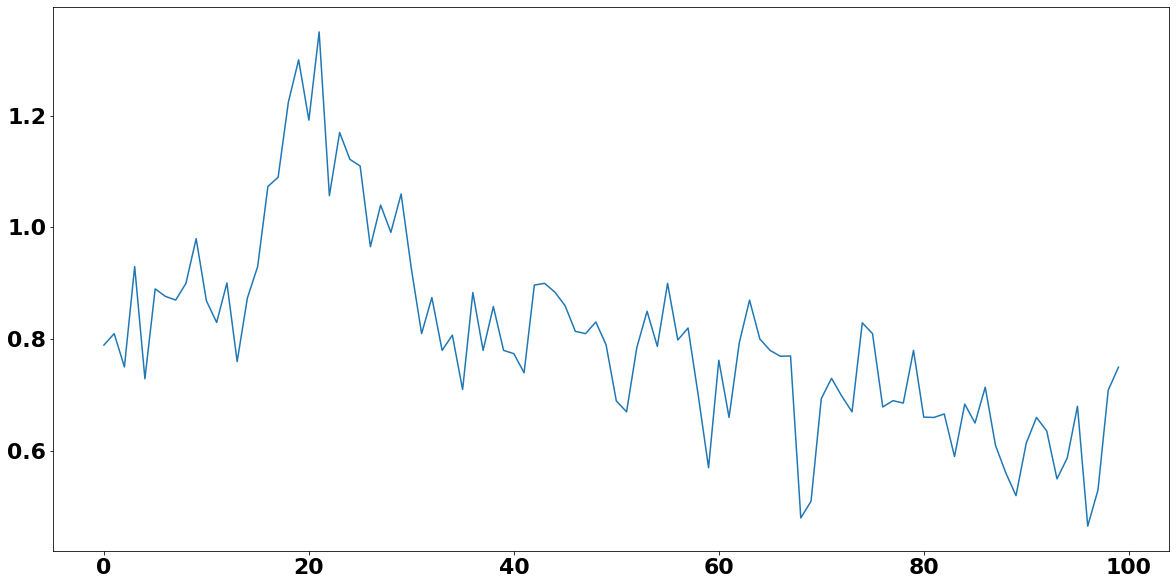

In [ ]:
df.Mean[:100].plot()

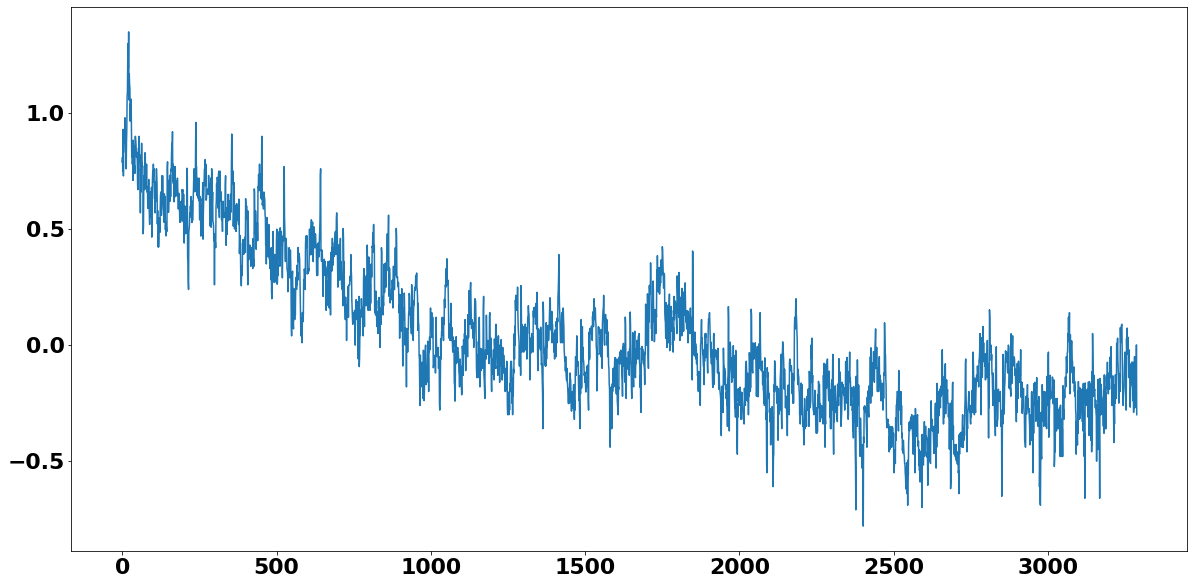

In [ ]:
df.Mean.plot()

In [ ]:
df= df.pivot(index="Date", columns = "Source", values = "Mean")

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


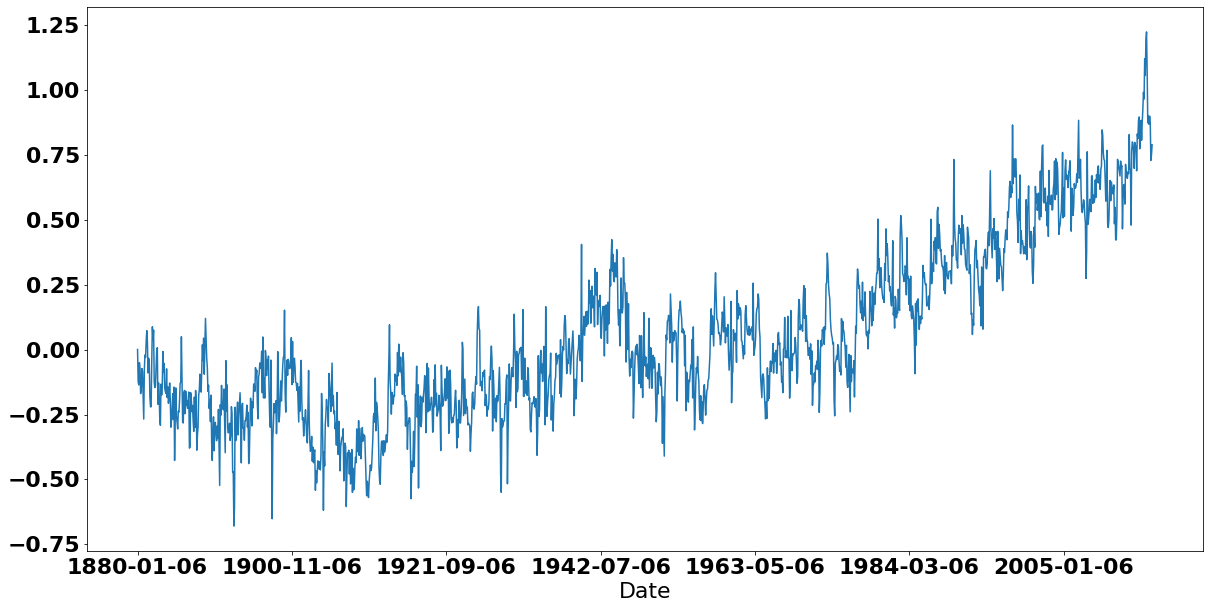

In [ ]:
df.GCAG.plot()

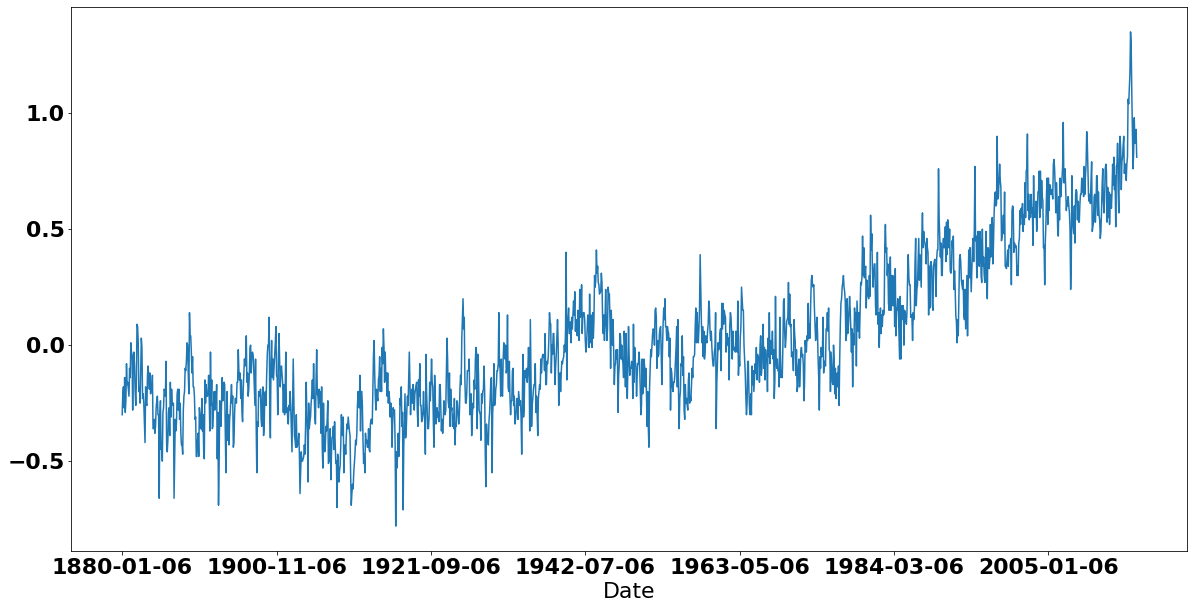

In [ ]:
df.GISTEMP.plot()

In [ ]:
df.index =pd.to_datetime(df.index)

In [ ]:
df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


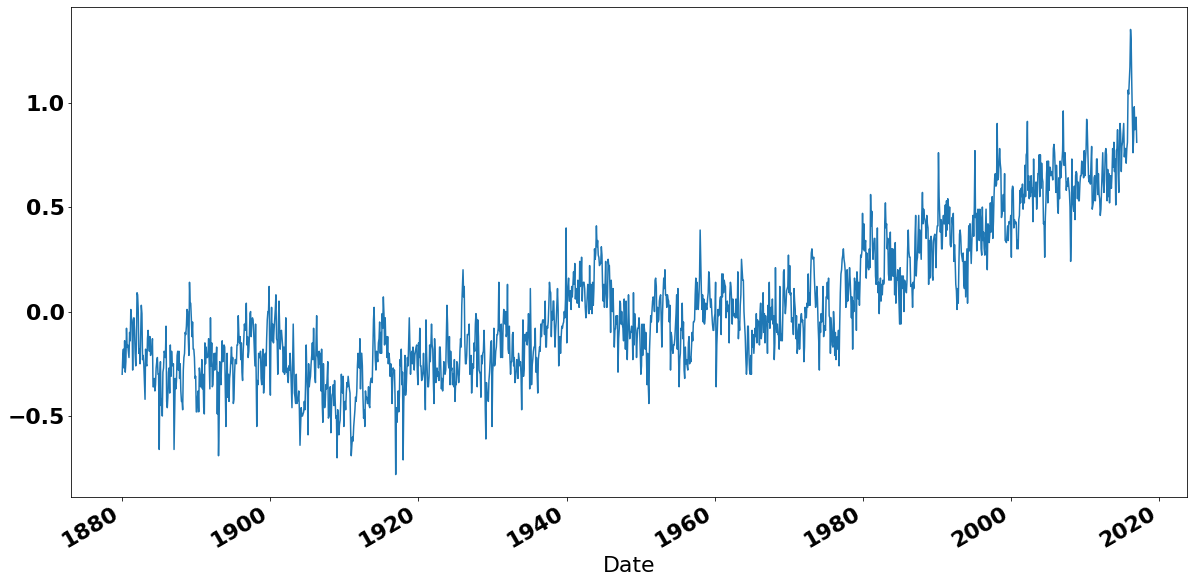

In [ ]:
df.GISTEMP.plot()

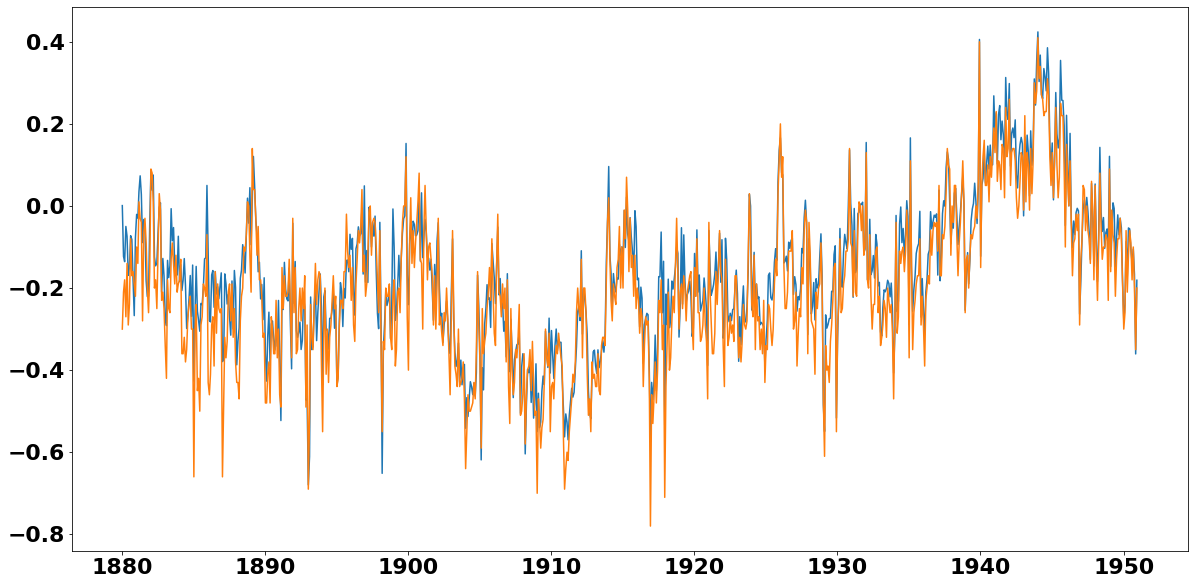

In [ ]:
plt.plot(df["1880":"1950"][["GCAG","GISTEMP"]])

In [ ]:
df["1880":"1950"]["GCAG"]

Date
1880-01-06    0.0009
1880-02-06   -0.1229
1880-03-06   -0.1357
1880-04-06   -0.0499
1880-05-06   -0.0738
               ...  
1950-08-06   -0.1382
1950-09-06   -0.1049
1950-10-06   -0.1661
1950-11-06   -0.3605
1950-12-06   -0.1810
Name: GCAG, Length: 852, dtype: float64

In [ ]:
import statsmodels.api as sm
import statsmodels

import scipy
from scipy.stats import pearsonr

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
